In [1]:
import geopandas as gpd
import igraph as ig
from pathlib import Path
import eptnr

# Loading and running on synthetic data
In `create_a_synthetic_problem_graph.ipynb` we have demonstrated how to create a synthetic dataset. In this notebook, we show how to load one of the synthetic datasets which we have included in the `eptnr` package back into memory and how to run our greedy baseline algorithm on it.

## Loading, set-up, and running

In [2]:
# Load data
STORAGE_PATH = Path(eptnr.__path__[0])
census_data = gpd.read_file(STORAGE_PATH.joinpath('datasets/synthetic_1/census_data.geojson'))
transit_graph = ig.Graph.Read_Picklez(STORAGE_PATH.joinpath('datasets/synthetic_1/graph.picklez'))

In [3]:
# Set-up reward
## here the com_threshold is the Cumulative Opportunity Measure cut-off in minutes
## i.e. we consider all POIs reachable within that time limit and use that as a metric
## for access equality.
from eptnr.rewards import EgalitarianTheilReward
reward_func = EgalitarianTheilReward(census_data=census_data, com_threshold=15, verbose=True)

In this example, we are interested in the highest reward configuration with budget **equal to** 3. However, if we were interested in finding the graph configuration with the maximum reward **within** a budget of 3 edges, which conforms with the EPTNR problem definition in our paper, we would use `from eptnr.baselines.greedy_baseline import greedy_max_baseline`.

In [4]:
# Set-up algorithm
from eptnr.baselines.greedy_baseline import greedy_baseline

## define what edges should be tried to be removed - in this case these are all but walking edges
edge_types = set(transit_graph.es['type']) - {'walk'}
## set the budget of lines to remove
budget = 3
## this function runs the greedy baseline algorithm and returns a tuple
## of rewards and edges
rewards, edges = greedy_baseline(transit_graph, reward_func, edge_types, budget)

INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=15	n_vertices=6Created subgraph:
	n_edges=14
	n_vertices=6
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=2.534161618127137
	scaled_reward=0.00031415065169471167
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=15	n_vertices=6Created subgraph:
	n_edges=14
	n_vertices=6
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.01800692046016058
	scaled_reward=91.38995616965695
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=15	n_vertices=6Created subgraph:
	n_edges=14
	n_vertices=6
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7

In [5]:
rewards, edges

([91.38995616965695, 91.38995616965695, 87.07255941681852], [13, 12, 14])

## Plotting

In [6]:
from eptnr.plotting.solution_plotting import plot_rewards_and_graphs

INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/plotting/solution_plotting.py:For solution 0, Removed edges: [13, 12, 14]


(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

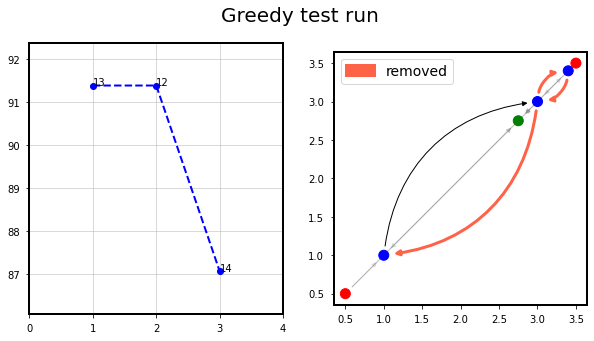

In [7]:
plot_rewards_and_graphs(transit_graph, [(rewards, edges)], title='Greedy test run')

For this simple use case we could even check whether the solution found by the algorithm is correct by looking at all possible solutions:

INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/analysis/full_problem_exploration.py:Possible states: [[[]], [[11], [12], [13], [14]], [[11, 12], [11, 13], [11, 14], [12, 13], [12, 14], [13, 14]], [[11, 12, 13], [11, 12, 14], [11, 13, 14], [12, 13, 14]]]
  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=15	n_vertices=6Created subgraph:
	n_edges=15
	n_vertices=6
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.01800692046016058
	scaled_reward=91.38995616965695
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/analysis/full_problem_exploration.py:For state [] obtained rewards [91.38995616965695]
INFO:/home/rico/Documents/thesis/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=15	n_vertices=6Created subgraph:
	n_edges=14
	n_vertices=

(<Figure size 1152x1382.4 with 24 Axes>,
 array([[<AxesSubplot:title={'center':'Reward: 91.3900'}>,
         <AxesSubplot:title={'center':'Reward: 0.0003'}>,
         <AxesSubplot:title={'center':'Reward: 0.0003'}>,
         <AxesSubplot:title={'center':'Reward: 0.0003'}>],
        [<AxesSubplot:>, <AxesSubplot:title={'center':'Reward: 91.3900'}>,
         <AxesSubplot:title={'center':'Reward: 0.0003'}>,
         <AxesSubplot:title={'center':'Reward: 0.0005'}>],
        [<AxesSubplot:>, <AxesSubplot:title={'center':'Reward: 91.3900'}>,
         <AxesSubplot:title={'center':'Reward: 0.0005'}>,
         <AxesSubplot:title={'center':'Reward: 0.0005'}>],
        [<AxesSubplot:>, <AxesSubplot:title={'center':'Reward: 87.0726'}>,
         <AxesSubplot:title={'center':'Reward: 91.3900'}>,
         <AxesSubplot:title={'center':'Reward: 87.0726'}>],
        [<AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:title={'center':'Reward: 87.0726'}>, <AxesSubplot:>],
        [<AxesSubplot:>, <Axes

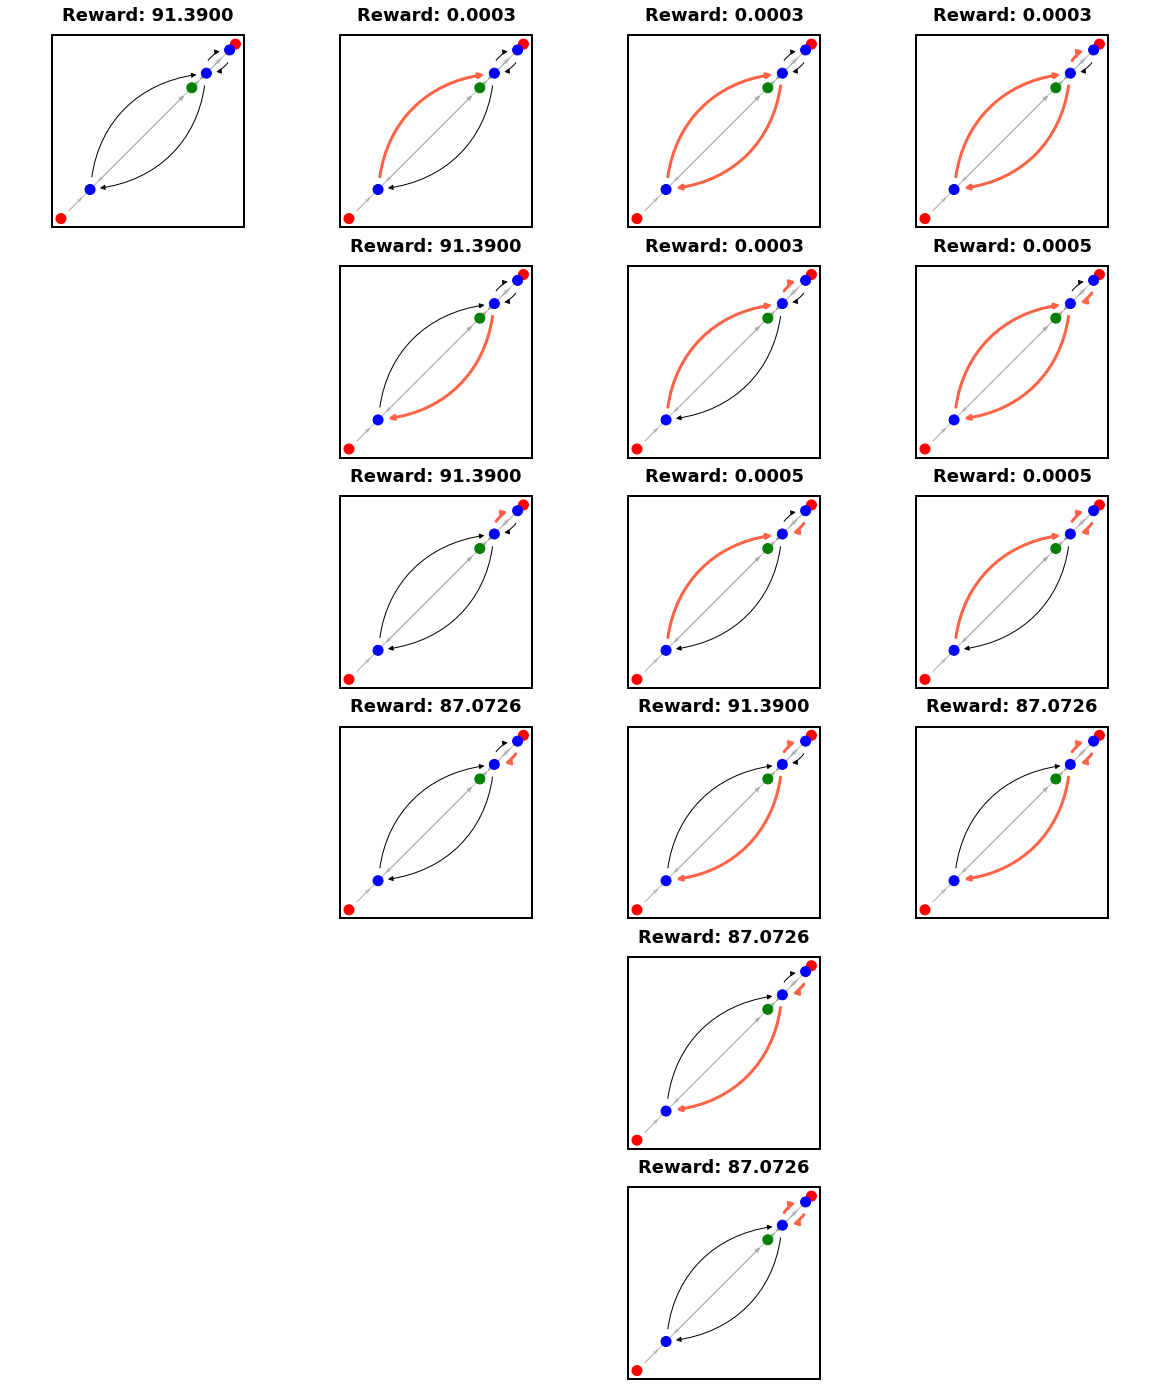

In [8]:
from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration

configurations, rewards = full_problem_exploration(transit_graph, reward_func, edge_types)
plot_full_problem_exploration(transit_graph, configurations, rewards)

From the above problem exploration we can see that the greedy algorithm correctly identified the optimal configuration with a budget **equal to** 3.